In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('owid-covid-data.csv')
print(data)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1           AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...         ...       ...          ...         ...          ...        ...   
103138      ZWE    Africa     Zimbabwe  2021-07-13      73271.0     2845.0   
103139      ZWE    Africa     Zimbabwe  2021-07-14      76381.0     3110.0   
103140      ZWE    Africa     Zimbabwe  2021-07-15      78872.0     2491.0   
103141      ZWE    Africa     Zimbabwe  2021-07-16      81168.0     2296.0   
103142      ZWE    Africa     Zimbabwe  2021-07-17      82613.0     1445.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [2]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
data.isnull().sum()

iso_code                                      0
continent                                  4813
location                                      0
date                                          0
total_cases                                3946
new_cases                                  3949
new_cases_smoothed                         4959
total_deaths                              14190
new_deaths                                14034
new_deaths_smoothed                        4959
total_cases_per_million                    4473
new_cases_per_million                      4476
new_cases_smoothed_per_million             5481
total_deaths_per_million                  14704
new_deaths_per_million                    14548
new_deaths_smoothed_per_million            5481
reproduction_rate                         20176
icu_patients                              92448
icu_patients_per_million                  92448
hosp_patients                             90222
hosp_patients_per_million               

In [5]:
data.query("location == 'Kenya'")

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
49129,KEN,Africa,Kenya,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,...,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7,0.601,NaN
49130,KEN,Africa,Kenya,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,...,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7,0.601,NaN
49131,KEN,Africa,Kenya,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,...,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7,0.601,NaN
49132,KEN,Africa,Kenya,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,...,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7,0.601,NaN
49133,KEN,Africa,Kenya,2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,...,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7,0.601,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49623,KEN,Africa,Kenya,2021-07-13,189703.0,761.0,464.286,3732.0,9.0,5.000,...,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7,0.601,NaN
49624,KEN,Africa,Kenya,2021-07-14,190183.0,480.0,460.571,3737.0,5.0,4.571,...,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7,0.601,NaN
49625,KEN,Africa,Kenya,2021-07-15,191020.0,837.0,499.286,3746.0,9.0,4.286,...,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7,0.601,NaN
49626,KEN,Africa,Kenya,2021-07-16,191712.0,692.0,533.571,3754.0,8.0,5.143,...,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7,0.601,NaN


In [6]:
data.dropna(subset=['date'])

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103138,ZWE,Africa,Zimbabwe,2021-07-13,73271.0,2845.0,2186.857,2274.0,38.0,47.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
103139,ZWE,Africa,Zimbabwe,2021-07-14,76381.0,3110.0,2307.714,2332.0,58.0,51.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
103140,ZWE,Africa,Zimbabwe,2021-07-15,78872.0,2491.0,2355.571,2418.0,86.0,55.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
103141,ZWE,Africa,Zimbabwe,2021-07-16,81168.0,2296.0,2300.286,2520.0,102.0,62.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [8]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [9]:
data.fillna(0)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103138,ZWE,Africa,Zimbabwe,2021-07-13,73271.0,2845.0,2186.857,2274.0,38.0,47.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,0.0
103139,ZWE,Africa,Zimbabwe,2021-07-14,76381.0,3110.0,2307.714,2332.0,58.0,51.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,0.0
103140,ZWE,Africa,Zimbabwe,2021-07-15,78872.0,2491.0,2355.571,2418.0,86.0,55.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,0.0
103141,ZWE,Africa,Zimbabwe,2021-07-16,81168.0,2296.0,2300.286,2520.0,102.0,62.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,0.0


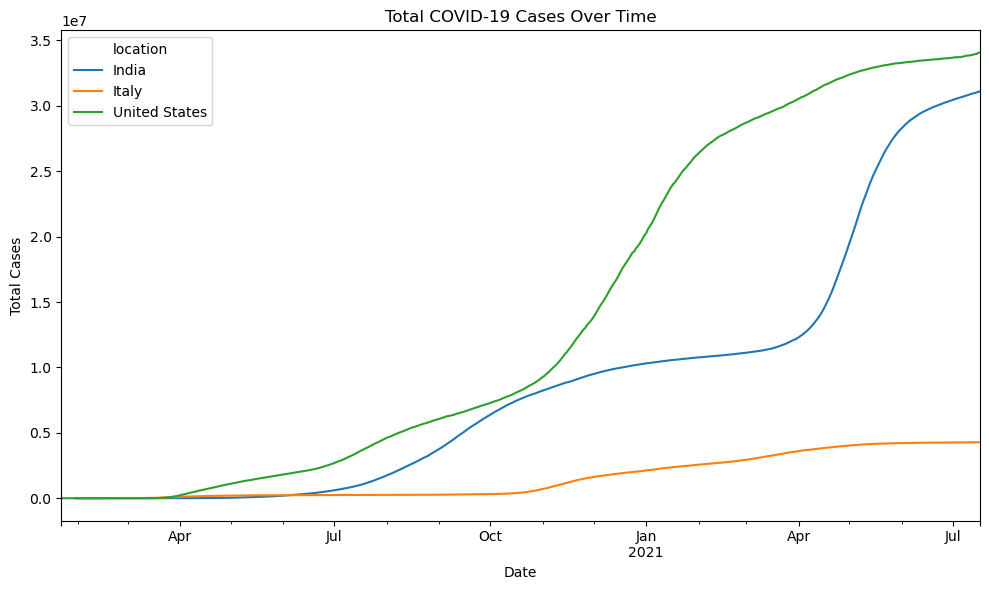

In [14]:
selected_countries = ['United States', 'India', 'Italy']
data2 = data[data['location'].isin(selected_countries)]

pivot_cases = data2.pivot(index='date', columns='location', values='total_cases')

pivot_cases.plot(figsize=(10,6))
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title='location')
plt.tight_layout()
plt.show()

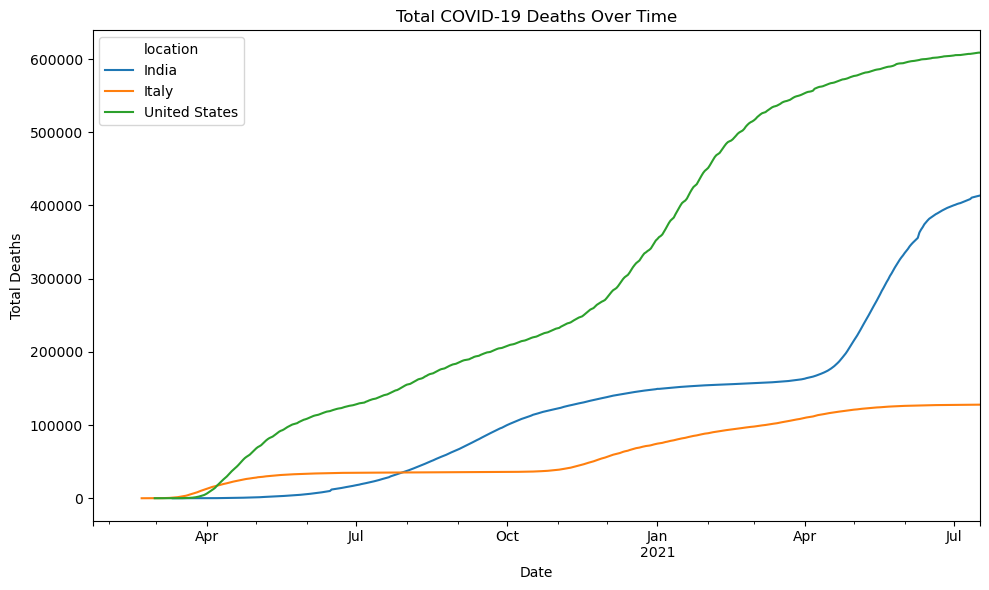

In [15]:
pivot_deaths = data2.pivot(index='date', columns='location', values='total_deaths')

pivot_deaths.plot(figsize=(10,6))
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(title='location')
plt.tight_layout()
plt.show()


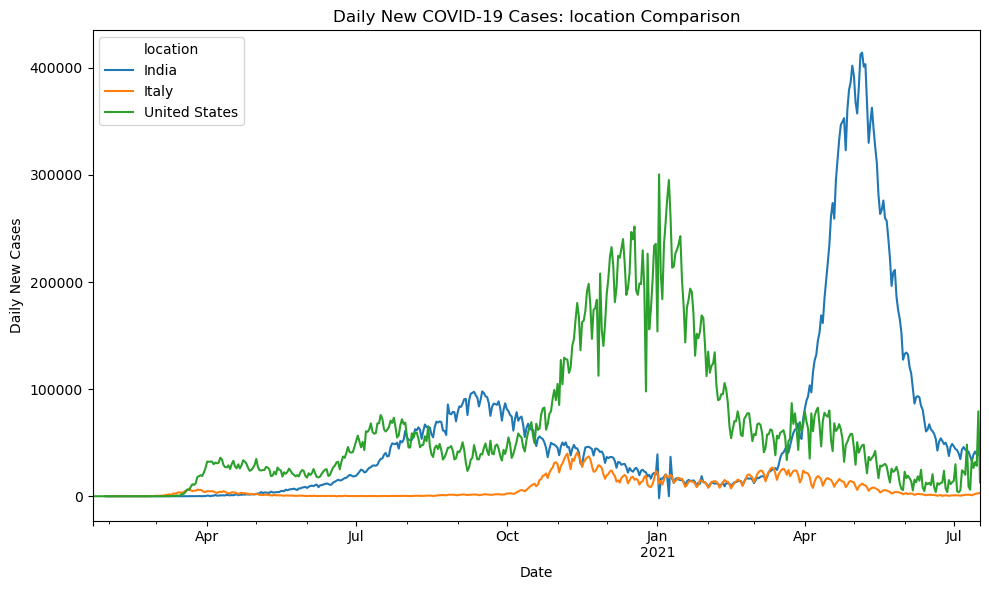

In [16]:
data2 = data2.sort_values(['location', 'date'])
data2['daily_new_cases'] = data2.groupby('location')['total_cases'].diff().fillna(0)

data3 = data2.pivot(index='date', columns='location', values='new_cases')

data3.plot(figsize=(10,6))
plt.title("Daily New COVID-19 Cases: location Comparison")
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.legend(title='location')
plt.tight_layout()
plt.show()

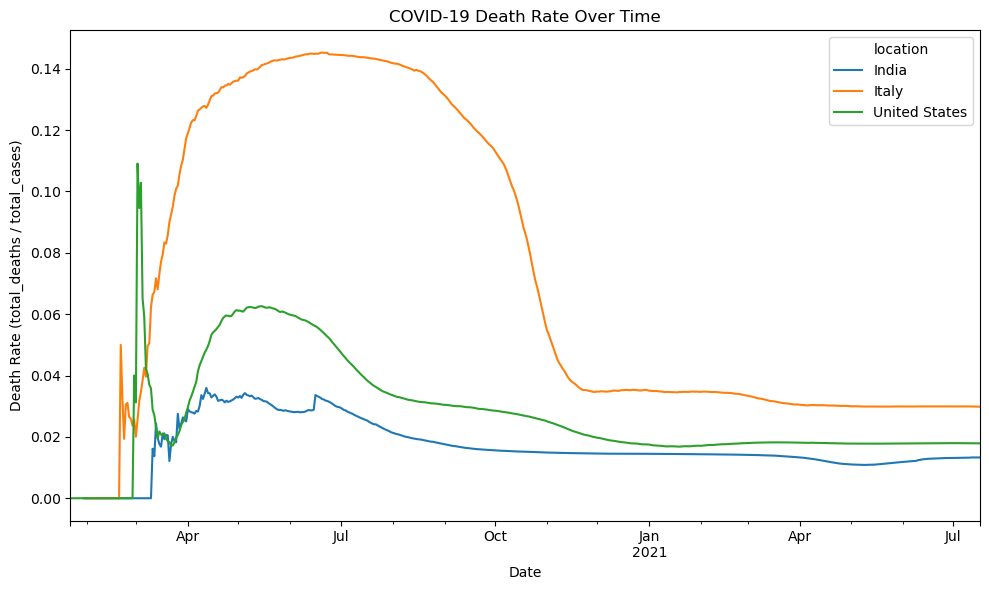

In [17]:
data2['death_rate'] = data2['total_deaths'] / data2['total_cases']
data2['death_rate'] = data2['death_rate'].replace([float('inf'), -float('inf')], pd.NA)
data2['death_rate'] = data2['death_rate'].fillna(0)

data3 = data2.pivot(index='date', columns='location', values='death_rate')

data3.plot(figsize=(10,6))
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (total_deaths / total_cases)")
plt.legend(title='location')
plt.tight_layout()
plt.show()


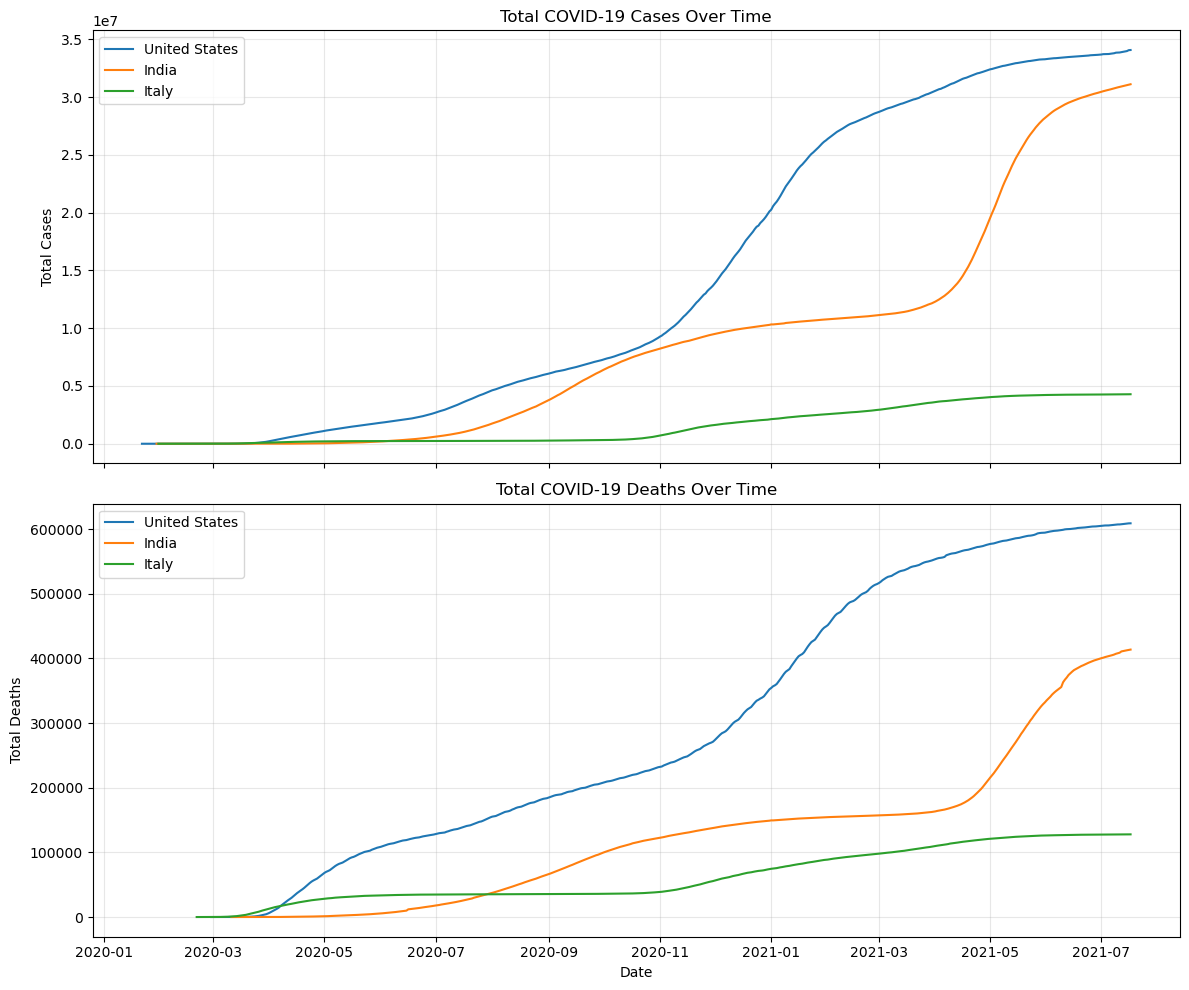

In [19]:
countries = ['United States', 'India', 'Italy']
data2 = data[data['location'].isin(countries)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

for location in countries:
    data4 = data2[data2['location'] == location]
    ax1.plot(data4['date'], data4['total_cases'], label=location)

ax1.set_title('Total COVID-19 Cases Over Time')
ax1.set_ylabel('Total Cases')
ax1.legend()
ax1.grid(True, alpha=0.3)

for location in countries:
    data4 = data2[data2['location'] == location]
    ax2.plot(data4['date'], data4['total_deaths'], label=location)

ax2.set_title('Total COVID-19 Deaths Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


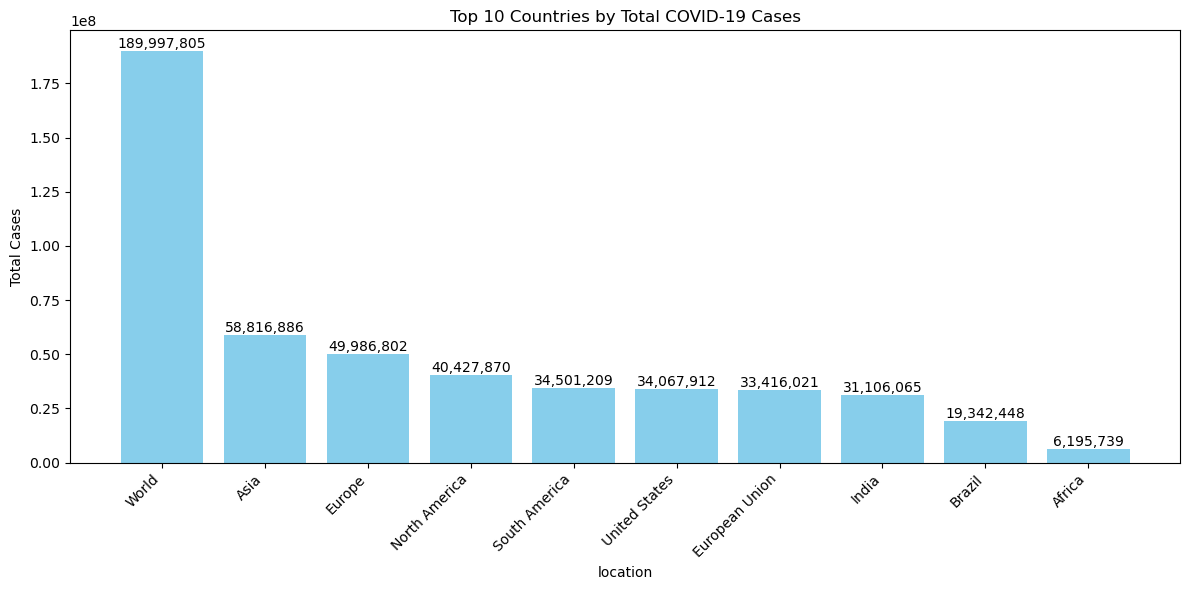

In [20]:
data5 = data.sort_values('date').groupby('location').last().reset_index()

data6 = data5.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(data6['location'], data6['total_cases'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', ha='center', va='bottom', rotation=0)

plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('location')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


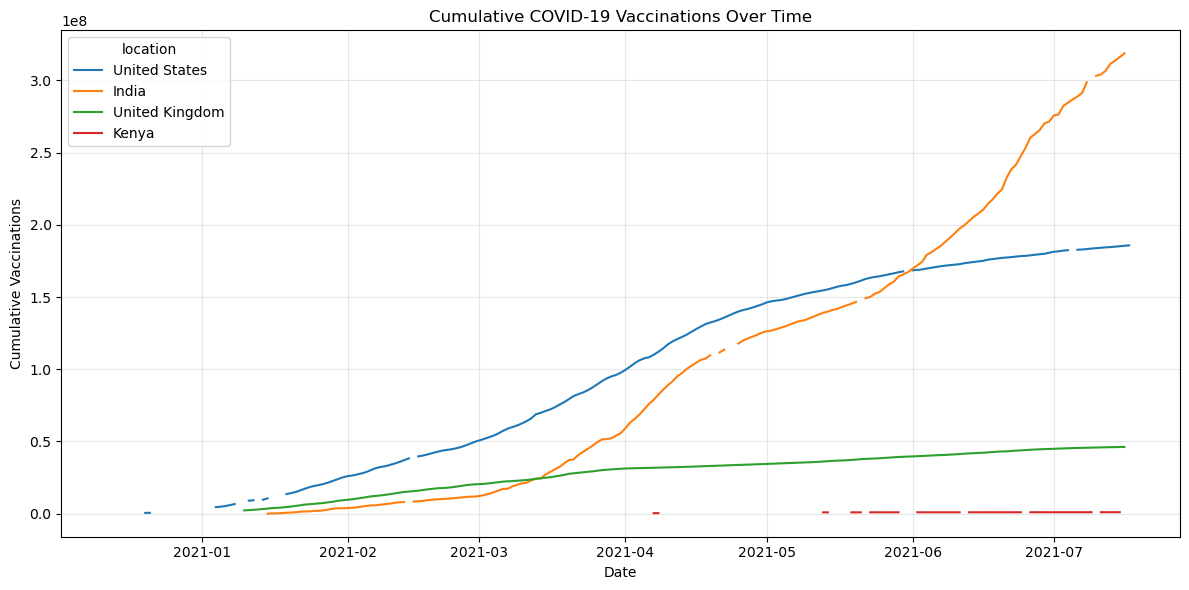

In [21]:
data6 = ['United States', 'India', 'United Kingdom', 'Kenya']

data7 = data[data['location'].isin(data6)]

plt.figure(figsize=(12, 6))

for location in data6:
    data8 = data7[data7['location'] == location]
    plt.plot(data8['date'], data8['people_vaccinated'], label=location)

plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.legend(title='location')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Based on the data provided and the visualizations created, we can draw the following conclusions:
# 1. The total number of COVID-19 cases and deaths has varied significantly across different countries over time.
# 2. The United States has consistently had the highest number of total cases and deaths compared to other countries.
# 3. The daily new cases have shown fluctuations, with peaks and troughs in different countries.
# 4. Kenya had a relatively lower number of cases and deaths compared to the other countries in the analysis.
# 5. The Asian continent had a significant number of cases, with India showing a steep rise in cases at certain points.